In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *  
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding
from IPython.display import display 
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv('/home/spriyanshu723/hack/Dataset/final_train.csv')
data_train.head()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,...,Grade 2,0.0,0,0,0,0,0,0,0,1.0
1,1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
3,3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,...,Grade 4,0.0,0,0,0,0,0,0,0,1.0
4,4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0


In [4]:
data_train.shape

(631761, 54)

In [5]:
data_train.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
building_id,a3380c4fd9,a3380c503e,a338a4e5f2,a338a4e71f,a339d612f3
district_id,7,7,7,7,7
vdcmun_id,701,701,701,701,701
ward_id,70102,70102,70103,70103,70105
legal_ownership_status,Private,Private,Private,Private,Private
count_families,1,1,1,1,1
has_secondary_use,0,0,0,0,0
has_secondary_use_agriculture,0,0,0,0,0
has_secondary_use_hotel,0,0,0,0,0


In [6]:
data_train.columns

Index(['Unnamed: 0', 'building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_supe

In [7]:
data_train = data_train.drop(['Unnamed: 0'], axis=1)

In [8]:
data_train.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,Grade 2,0.0,0,0,0,0,0,0,0,1.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,Grade 4,0.0,0,0,0,0,0,0,0,1.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0


In [9]:
data_train.shape

(631761, 53)

In [ ]:
RandomForestClassifier

In [ ]:
clas = RandomForestClassifier(n_jobs=-1)

In [ ]:
clas.fit(data_train.drop('damage_grade',axis=1),data_train.damage_grade)

In [ ]:
data_train.head()

# Cateogorical Values

In [10]:
train_cats(data_train)

In [11]:
data_train.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,Grade 2,0.0,0,0,0,0,0,0,0,1.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,Grade 4,0.0,0,0,0,0,0,0,0,1.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0


In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 100):
        with pd.option_context("display.max_columns", 100):
            display(df)

In [ ]:
display_all(data_train.isnull().sum().sort_index()/len(data_train))

In [ ]:
proc_df

In [12]:
df, y, nas = proc_df(data_train, 'damage_grade')

In [13]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,count_families_na,has_repair_started_na
0,615684,7,701,70102,3,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1.0,False,False
1,615685,7,701,70102,3,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1.0,False,False
2,615686,7,701,70103,3,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1.0,False,False
3,615687,7,701,70103,3,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1.0,False,False
4,615688,7,701,70105,3,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1.0,False,False


In [14]:
y

array([1, 2, 2, ..., 4, 4, 4], dtype=int8)

In [15]:
nas

{'count_families': 1.0, 'has_repair_started': 0.0}

In [ ]:
df.shape

In [ ]:
data_train.shape

In [ ]:
df.columns

# BASE RANDOM FOREST

In [ ]:
m = RandomForestClassifier(n_jobs=-1)

In [ ]:
m.fit(df, y)

In [ ]:
m.score(df, y)

# VALIDATION SET

In [16]:
df.shape

(631761, 54)

In [17]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 131761
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data_train, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((500000, 54), (500000,), (131761, 54), (131761,))

In [ ]:
k = RandomForestClassifier(n_jobs=-1)
%time k.fit(X_train,y_train)

In [ ]:
k.score(X_valid, y_valid)

In [ ]:
q = RandomForestClassifier(n_jobs=-1, oob_score=True)
%time q.fit(X_train,y_train)

In [ ]:
q.score(X_valid, y_valid)

In [ ]:
q.oob_score_

In [ ]:
r = RandomForestClassifier(n_jobs=-1, bootstrap=False)
%time r.fit(X_train,y_train)

In [ ]:
r.score(X_valid, y_valid)

In [ ]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=20, oob_score=True)
%time s.fit(X_train, y_train)

In [ ]:
s.score(X_valid, y_valid)

In [ ]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=40, oob_score=True)
%time s.fit(X_train, y_train)

In [ ]:
s.score(X_valid, y_valid)

In [ ]:
s.oob_score_

In [ ]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=80, oob_score=True)
%time s.fit(X_train, y_train)

In [ ]:
s.score(X_valid, y_valid)

In [ ]:
s.oob_score_

In [ ]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score=True)
%time s.fit(X_train, y_train)

In [ ]:
s.score(X_valid, y_valid)

In [ ]:
s.oob_score_

In [21]:
w = RandomForestClassifier(n_jobs=-1, n_estimators=150, oob_score=True)
%time w.fit(X_train, y_train)

CPU times: user 4min 23s, sys: 49.4 s, total: 5min 13s
Wall time: 58.2 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [22]:
w.score(X_valid, y_valid)

0.6761257124642345

In [23]:
w.oob_score_

0.776118

In [ ]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=200, oob_score=True)
%time s.fit(X_train, y_train)

In [ ]:
s.score(X_valid, y_valid)

In [ ]:
s.oob_score_

In [18]:
s = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_features=0.5, oob_score=True)
%time s.fit(X_train, y_train)

CPU times: user 10min 30s, sys: 54.1 s, total: 11min 24s
Wall time: 1min 45s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [19]:
s.score(X_valid, y_valid)

0.671215306501924

In [20]:
s.oob_score_

0.777764

In [45]:
X_train.

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cem

In [46]:
rm_train = X_train.drop(['building_id'], axis=1)
rm_valid = X_valid.drop(['building_id'], axis=1)

In [47]:
rm_train.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

In [49]:
g = RandomForestClassifier(n_jobs=-1, n_estimators=150, oob_score=True)
%time g.fit(rm_train, y_train)
g.score(rm_valid, y_valid)

CPU times: user 4min 5s, sys: 51.4 s, total: 4min 57s
Wall time: 56.6 s


0.6723537313772664

In [50]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cem

In [52]:
dr = df.drop(['building_id'], axis=1)
dr.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

# Feature Importance

In [59]:
fi = rf_feat_importance(g, dr)

In [60]:
fi[:30]

,cols,imp
21,height_ft_post_eq,0.149642
17,count_floors_post_eq,0.137542
40,condition_post_eq,0.120137
2,ward_id,0.084123
19,plinth_area_sq_ft,0.074739
18,age_building,0.071937
41,area_assesed,0.056793
1,vdcmun_id,0.056479
20,height_ft_pre_eq,0.030784
52,has_repair_started_na,0.027288


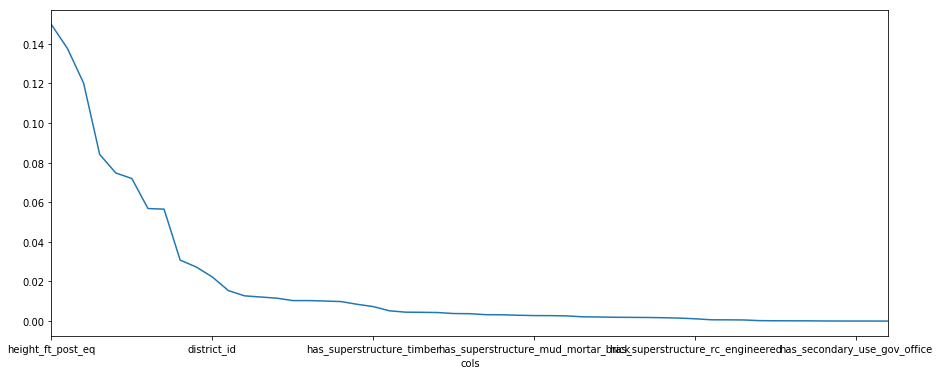

In [62]:
fi.plot('cols', 'imp', figsize=(15,6), legend=False)

In [63]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

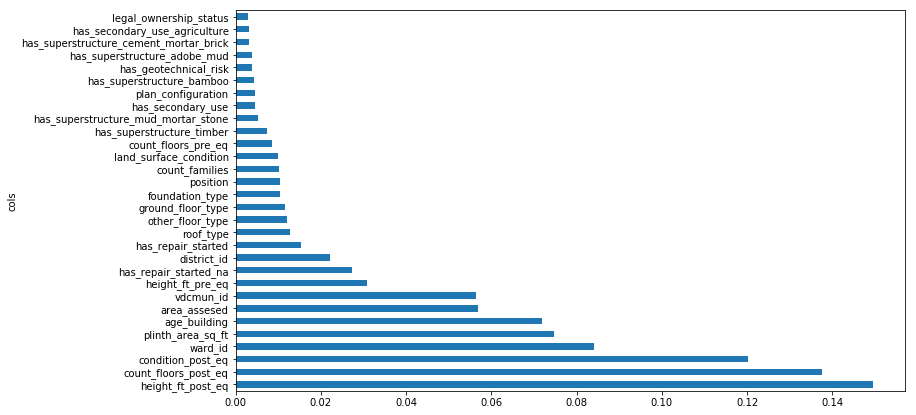

In [64]:
plot_fi(fi[:30]);

In [65]:
keep = fi[fi.imp>0.003].cols

In [66]:
keep

21                         height_ft_post_eq
17                      count_floors_post_eq
40                         condition_post_eq
2                                    ward_id
19                         plinth_area_sq_ft
18                              age_building
41                              area_assesed
1                                  vdcmun_id
20                          height_ft_pre_eq
52                     has_repair_started_na
0                                district_id
50                        has_repair_started
24                                 roof_type
26                          other_floor_type
25                         ground_floor_type
23                           foundation_type
27                                  position
4                             count_families
22                    land_surface_condition
16                       count_floors_pre_eq
35                 has_superstructure_timber
30       has_superstructure_mud_mortar_stone
5         

In [67]:
len(keep)

29

In [68]:
data_new = df[keep].copy()
data_new.transpose()

,0,1,2,3,4,5,6,7,8,9,...,631751,631752,631753,631754,631755,631756,631757,631758,631759,631760
height_ft_post_eq,9,18,18,9,9,0,0,0,18,18,...,0,20,0,18,0,18,0,0,0,0
count_floors_post_eq,1,2,2,1,1,0,0,0,2,2,...,0,2,0,2,0,2,0,0,0,0
condition_post_eq,3,3,3,2,2,5,5,4,3,3,...,6,8,4,8,5,8,5,5,5,5
ward_id,70102,70102,70103,70103,70105,70105,70105,70106,70106,70106,...,366709,366709,366709,366709,366709,366709,366709,366709,366709,366709
plinth_area_sq_ft,324,456,452,546,324,548,574,468,654,654,...,725,504,598,513,513,513,342,342,306,840
age_building,32,34,20,44,25,24,27,24,23,26,...,50,1,35,13,9,13,35,35,19,12
area_assesed,1,1,1,1,1,2,2,2,1,1,...,1,1,2,1,2,1,2,2,2,2
vdcmun_id,701,701,701,701,701,701,701,701,701,701,...,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667
height_ft_pre_eq,9,18,18,9,9,18,18,18,18,18,...,18,20,18,18,18,18,18,18,18,18
has_repair_started_na,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [69]:
data_new.columns

Index(['height_ft_post_eq', 'count_floors_post_eq', 'condition_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'area_assesed',
       'vdcmun_id', 'height_ft_pre_eq', 'has_repair_started_na', 'district_id',
       'has_repair_started', 'roof_type', 'other_floor_type',
       'ground_floor_type', 'foundation_type', 'position', 'count_families',
       'land_surface_condition', 'count_floors_pre_eq',
       'has_superstructure_timber', 'has_superstructure_mud_mortar_stone',
       'has_secondary_use', 'plan_configuration', 'has_superstructure_bamboo',
       'has_geotechnical_risk', 'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick',
       'has_secondary_use_agriculture'],
      dtype='object')

In [70]:
n_trn

500000

In [71]:
X_train, X_valid = split_vals(data_new, n_trn)

In [73]:
h = RandomForestClassifier(n_jobs=-1, n_estimators=150, oob_score=True)
%time h.fit(X_train, y_train)
h.score(X_valid, y_valid)

CPU times: user 3min 41s, sys: 58.3 s, total: 4min 39s
Wall time: 47.8 s


0.667875926867586

In [74]:
h.oob_score_

0.772878

# One hot Encoding

In [87]:
data_train.shape

(631761, 52)

In [88]:
#data_train = data_train.drop(['building_id'], axis=1)

In [89]:
data_train.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

In [90]:
df_train, y_train, nas = proc_df(data_train, 'damage_grade', max_n_cat=7)

In [91]:
df_train.head()

,district_id,vdcmun_id,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,...,position_Attached-2 side,position_Attached-3 side,position_Not attached,position_nan,area_assesed_Both,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,area_assesed_nan
0,7,701,70102,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7,701,70102,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7,701,70103,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7,701,70103,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7,701,70105,1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
y_train

array([1, 2, 2, ..., 4, 4, 4], dtype=int8)

In [93]:
nas

{'count_families': 1.0, 'has_repair_started': 0.0}

In [94]:
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(y_train, n_trn)

In [95]:
g = RandomForestClassifier(n_jobs=-1, n_estimators=150, oob_score=True)
%time g.fit(X_train, y_train)
g.score(X_valid, y_valid)

CPU times: user 4min 43s, sys: 1min 4s, total: 5min 48s
Wall time: 1min 10s


0.6724523948664628

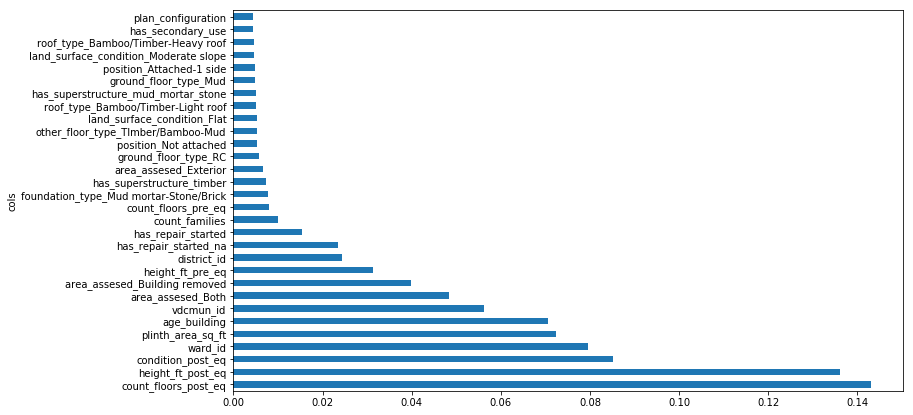

In [97]:
fi = rf_feat_importance(g, df_train)
plot_fi(fi[:30])

In [98]:
fi[:30]

,cols,imp
16,count_floors_post_eq,0.143103
20,height_ft_post_eq,0.136017
33,condition_post_eq,0.085242
2,ward_id,0.079548
18,plinth_area_sq_ft,0.072385
17,age_building,0.070547
1,vdcmun_id,0.056202
80,area_assesed_Both,0.048397
81,area_assesed_Building removed,0.039781
19,height_ft_pre_eq,0.031290


# Removing Reduntant Feature

In [99]:
from scipy.cluster import hierarchy as hc

In [100]:
data_new.columns

Index(['height_ft_post_eq', 'count_floors_post_eq', 'condition_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'area_assesed',
       'vdcmun_id', 'height_ft_pre_eq', 'has_repair_started_na', 'district_id',
       'has_repair_started', 'roof_type', 'other_floor_type',
       'ground_floor_type', 'foundation_type', 'position', 'count_families',
       'land_surface_condition', 'count_floors_pre_eq',
       'has_superstructure_timber', 'has_superstructure_mud_mortar_stone',
       'has_secondary_use', 'plan_configuration', 'has_superstructure_bamboo',
       'has_geotechnical_risk', 'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick',
       'has_secondary_use_agriculture'],
      dtype='object')

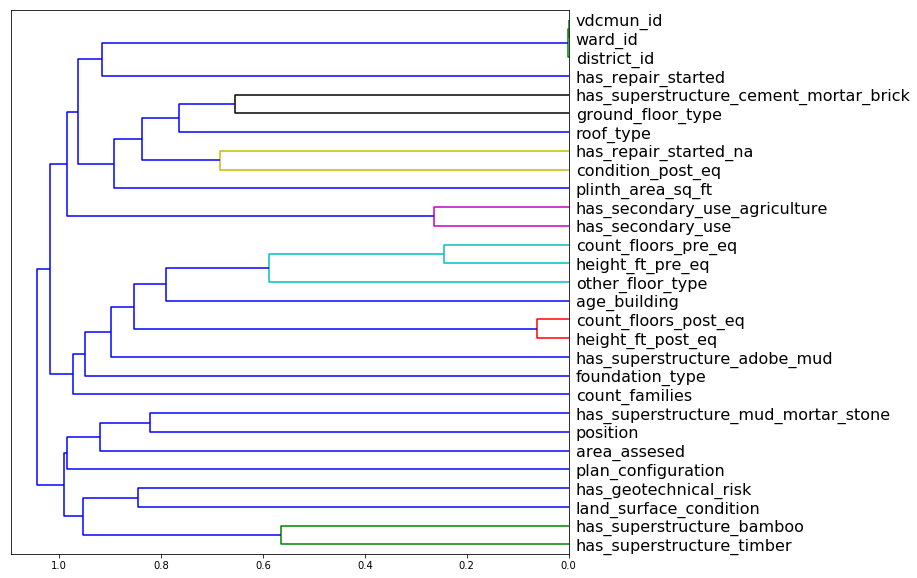

In [101]:
corr = np.round(scipy.stats.spearmanr(data_new).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=data_new.columns, orientation='left', leaf_font_size=16)
plt.show()

In [110]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [105]:
get_oob(data_new)

0.776218

In [106]:
for c in ('vdcmun_id', 'ward_id', 'district_id'):
    print(c, get_oob(data_new.drop(c, axis=1)))

vdcmun_id 0.768636
ward_id 0.767592
district_id 0.77386


In [107]:
to_drop = ['district_id']
get_oob(data_new.drop(to_drop, axis = 1))

0.773918

In [109]:
data_new.columns

Index(['height_ft_post_eq', 'count_floors_post_eq', 'condition_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'area_assesed',
       'vdcmun_id', 'height_ft_pre_eq', 'has_repair_started_na', 'district_id',
       'has_repair_started', 'roof_type', 'other_floor_type',
       'ground_floor_type', 'foundation_type', 'position', 'count_families',
       'land_surface_condition', 'count_floors_pre_eq',
       'has_superstructure_timber', 'has_superstructure_mud_mortar_stone',
       'has_secondary_use', 'plan_configuration', 'has_superstructure_bamboo',
       'has_geotechnical_risk', 'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick',
       'has_secondary_use_agriculture'],
      dtype='object')

In [111]:
data_new.drop(to_drop, inplace=True, axis = 1)
X_train, X_valid = split_vals(data_new, n_trn)

In [112]:
np.save('/home/spriyanshu723/hack/Dataset/keep_cols.npy',np.array(data_new.columns))